In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\msi 1'

In [3]:
os.chdir('C://Users//msi 1')

In [4]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1767,1767,"1,768",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1768,1768,"1,769",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1769,1769,"1,770",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN
1770,1770,"1,771",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [5]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,748,281"
1,1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,901,816"
2,2,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"192,809"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,439,123"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,930,122"
...,...,...,...,...,...,...,...,...,...,...,...,...
1767,1767,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,079"
1768,1768,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,838"
1769,1769,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1770,1770,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,607"


In [6]:
df=pd.DataFrame()

In [7]:
df=pd.merge(df1, df2)
df

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,748,281"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,901,816"
2,2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"192,809"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,439,123"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,930,122"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,1767,"1,768",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,079"
1768,1768,"1,769",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,838"
1769,1769,"1,770",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1770,1770,"1,771",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,607"


In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1772 non-null   object 
 1   MovieName        1772 non-null   object 
 2   Duration         1772 non-null   int64  
 3   Year             1772 non-null   int64  
 4   Rating           1772 non-null   float64
 5   Metascore        1772 non-null   object 
 6   Director1        1772 non-null   object 
 7   Director2        114 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1772 non-null   object 
 10  Star2            1772 non-null   object 
 11  Star3            1772 non-null   object 
 12  Star4            1772 non-null   object 
 13  Genre1           1772 non-null   object 
 14  Genre2           1772 non-null   object 
 15  Genre3           1772 non-null   object 
 16  GrossCollection  1772 non-null   object 
 17  Certification 

In [10]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1        1
1,178    1
1,189    1
1,188    1
1,187    1
        ..
588      1
587      1
586      1
585      1
1,772    1
Name: S No., Length: 1772, dtype: int64
no of unique values 1772
*****************
Mr                                         3
G                                          3
Godzilla                                   3
Charlie's Angels                           2
Assault on Precinct 13                     2
                                          ..
Iron Man 2                                 1
Star Wars: Episode VIII - The Last Jedi    1
A Knight's Tale                            1
Robin Hood: Prince of Thieves              1
Sadak 2                                    1
Name: MovieName, Length: 1729, dtype: int64
no of unique values 1729
*****************
107    49
100    43
109    42
110    41
105    40
       ..
45      1
166     1
176     1
201     1
75      1
Name: Duration, Length: 118, dtype: int64
no of unique values 118
*****************
2016    78
2014    7

In [11]:
df.replace("Nan", np.nan, inplace=True)

In [12]:
df.isnull().sum()

S No.                 0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore           188
Director1             0
Director2          1658
Director3          1759
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                1
Genre3              148
GrossCollection     294
Certification        10
votes                 0
dtype: int64

In [13]:
df.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [14]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification']=df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre3']=df['Genre3'].fillna(df['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [16]:
df['GrossCollection']=df['GrossCollection'].astype(float)
df['GrossCollection']=df['GrossCollection'].fillna(df['GrossCollection'].mean())

In [17]:
df.isnull().sum().sum()

5

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 0 to 1771
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1769 non-null   object 
 1   MovieName        1769 non-null   object 
 2   Duration         1769 non-null   int64  
 3   Year             1769 non-null   int64  
 4   Rating           1769 non-null   float64
 5   Metascore        1769 non-null   object 
 6   Director1        1769 non-null   object 
 7   Star1            1769 non-null   object 
 8   Star2            1769 non-null   object 
 9   Star3            1769 non-null   object 
 10  Star4            1769 non-null   object 
 11  Genre1           1769 non-null   object 
 12  Genre2           1769 non-null   object 
 13  Genre3           1769 non-null   object 
 14  GrossCollection  1769 non-null   float64
 15  Certification    1769 non-null   object 
 16  votes            1769 non-null   object 
dtypes: float64(2),

GTreating all columns which should be integer datatype but are object datatype.

In [22]:
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['S No.'] = df['S No.'].str.replace(',', '').astype(int)

# EDA

In [23]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

Duration

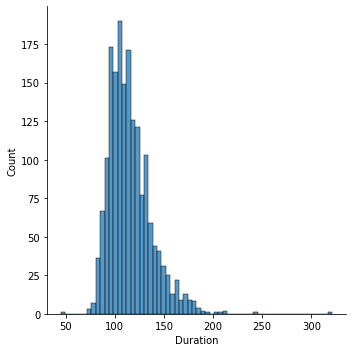

In [24]:
sns.displot(data=df, x="Duration",)

Most movies are 90 to 120 minutes long.
Very less movies are there which are less than 60 minutes or more than 200 minutes.

Year

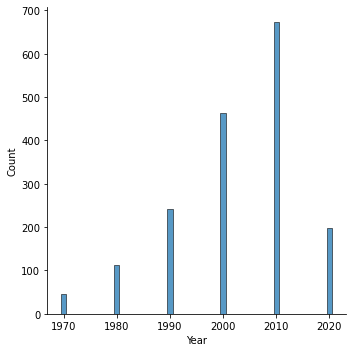

In [25]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

Most movies have been launched in the decade of 2000-2010.

Relation between years and ratings

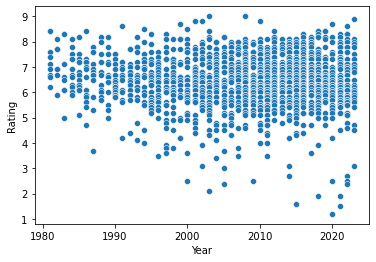

In [26]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()

Highest rated movies have been released in years between 2000-2010.
Some of new movies launched between year 2015-2020 has been the lowest rated movies.
Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

Metascore

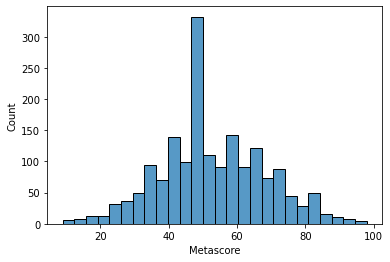

In [27]:
sns.histplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 50

Genre

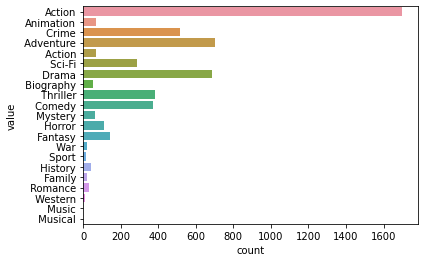

In [28]:
sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre

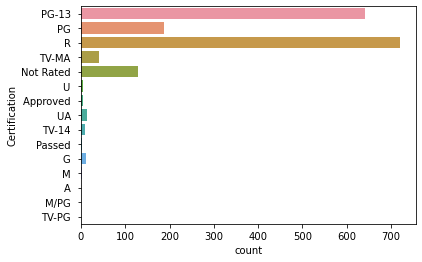

In [29]:
sns.countplot(y=df["Certification"])
plt.show()

Most movies are PG-13 and R rated.

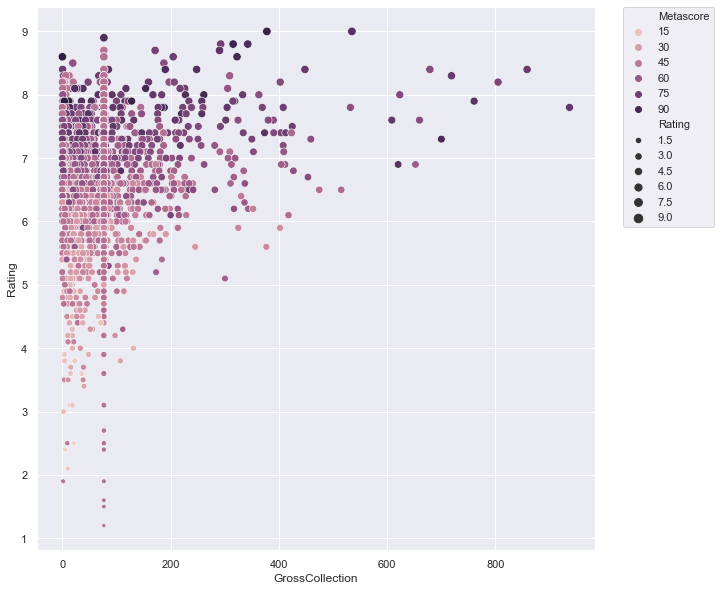

In [30]:
sns.set(font_scale=1)
fig_dims=(10, 10)
fig, ax=plt.subplots(figsize=fig_dims)
ax=sns.scatterplot(x="GrossCollection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can have the following conclusions :-

-Higher rated movies have been found to have higher gross collection.
-Even with high rating and metascore, movies have been found to be grossing below average.

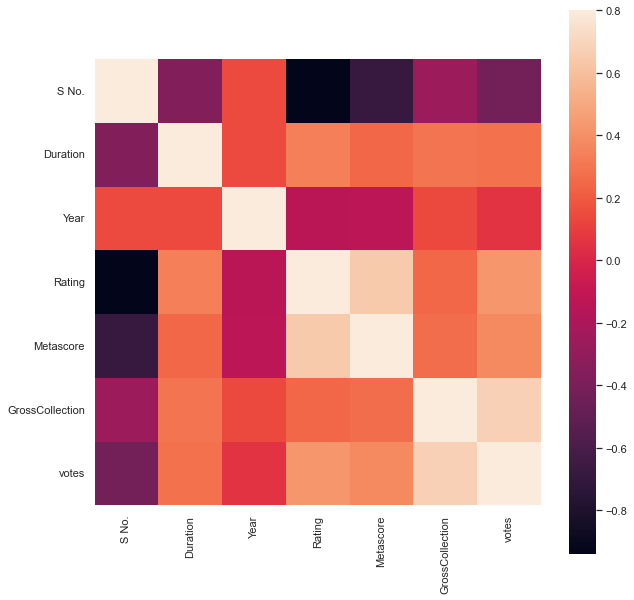

In [31]:
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

Metascore and rating are co related.

Gross collection and votes are co related.

# Preparing for machine learning

Dropping off columns which are not useful for machine learning

In [32]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

In [33]:
df1=df.drop(["S No.","MovieName",], axis=1)

Encoding the categorical data

In [34]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director1']=le.fit_transform(df1['Director1'])
df1['Star1']=le.fit_transform(df1['Star1'])
df1['Star2']=le.fit_transform(df1['Star2'])
df1['Star3']=le.fit_transform(df1['Star3'])
df1['Star4']=le.fit_transform(df1['Star4'])
df1['Genre1']=le.fit_transform(df1['Genre1'])
df1['Genre2']=le.fit_transform(df1['Genre2'])
df1['Genre3']=le.fit_transform(df1['Genre3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 0 to 1771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         1769 non-null   int64  
 1   Year             1769 non-null   int64  
 2   Rating           1769 non-null   float64
 3   Metascore        1769 non-null   int32  
 4   Director1        1769 non-null   int32  
 5   Star1            1769 non-null   int32  
 6   Star2            1769 non-null   int32  
 7   Star3            1769 non-null   int32  
 8   Star4            1769 non-null   int32  
 9   Genre1           1769 non-null   int32  
 10  Genre2           1769 non-null   int32  
 11  Genre3           1769 non-null   int32  
 12  GrossCollection  1769 non-null   float64
 13  Certification    1769 non-null   int32  
 14  votes            1769 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 209.7 KB


All columns have been converted into integer or float datatype.

Outlier Treatment
using z-score

In [36]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
8,153,2020,8.7,48,873,649,876,97,1406,0,5,4,76.853383,11,120126
20,137,1986,8.4,84,370,627,771,183,1058,0,1,13,85.160000,9,737923
21,101,2003,8.4,77,665,111,1162,649,746,0,5,11,0.710000,9,602577
23,145,2019,8.4,48,544,368,826,100,431,0,1,3,76.853383,5,36873
24,141,2019,8.4,48,928,166,719,992,1044,0,5,4,76.853383,5,31580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,95,1997,3.6,11,454,573,1063,509,1221,0,1,6,35.930000,7,56763
1749,99,2017,3.6,48,27,577,345,972,1063,0,5,4,76.853383,9,33499
1750,98,1996,3.5,40,194,518,48,14,280,0,11,4,3.790000,9,30480
1751,89,2011,3.5,37,767,310,514,587,1188,0,1,2,38.540000,6,27221


In [37]:
df1

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,152,2008,9.0,84,153,121,417,2,909,0,4,4,534.860000,7,2748281
1,201,2003,9.0,94,692,187,1114,471,1030,0,1,4,377.850000,7,1901816
2,140,2023,8.9,86,416,622,405,161,834,1,0,0,76.853383,6,192809
3,148,2010,8.8,74,153,420,571,359,731,0,1,13,292.580000,7,2439123
4,178,2001,8.8,92,692,187,436,950,1238,0,1,4,315.540000,7,1930122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,109,2021,1.9,48,711,591,280,1018,522,0,4,15,76.853383,11,179079
1768,160,2018,1.9,48,732,43,984,149,524,0,4,15,1.690000,5,47838
1769,85,2015,1.6,48,818,195,475,1093,1426,0,7,13,76.853383,9,42919
1770,125,2021,1.5,48,504,708,60,115,414,0,4,4,76.853383,9,39607


In [38]:
(1739-1470)*100/1739

15.468660149511214

15.5 % has been removed in outlier treatment, which is under considerable range.

Skewness Treatment

In [39]:
dfn.skew()

Duration           0.831018
Year              -0.927806
Rating            -0.304609
Metascore          0.169082
Director1         -0.118807
Star1              0.035245
Star2             -0.029210
Star3              0.018311
Star4              0.027858
Genre1             0.000000
Genre2             1.512255
Genre3             0.376664
GrossCollection    1.840335
Certification     -0.227238
votes              1.979503
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [40]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["GrossCollection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [41]:
dfn.skew()

Duration           0.022604
Year              -0.372391
Rating            -0.304609
Metascore          0.169082
Director1         -0.118807
Star1              0.035245
Star2             -0.029210
Star3              0.018311
Star4              0.027858
Genre1             0.000000
Genre2             0.085420
Genre3             0.376664
GrossCollection    1.840335
Certification     -0.227238
votes              1.979503
dtype: float64

Skewness has been removed from all the required columns

To prepare model for Gross Collection.

Scaling of Independent features

In [42]:
X=dfn.drop(["GrossCollection"],axis=1)
y=dfn["GrossCollection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

Predicting the best random state

In [43]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.49275122284009354
At random state 0, The test accuracy is :-0.45023530360318487


At random state 1, The training accuracy is :-0.4638634934035868
At random state 1, The test accuracy is :-0.5028338073077476


At random state 2, The training accuracy is :-0.45851360634910077
At random state 2, The test accuracy is :-0.514011731317112


At random state 3, The training accuracy is :-0.48349656136886565
At random state 3, The test accuracy is :-0.4742735148970001


At random state 4, The training accuracy is :-0.5009664555739124
At random state 4, The test accuracy is :-0.4371692565050286


At random state 5, The training accuracy is :-0.4811797794378063
At random state 5, The test accuracy is :-0.4774463208165197


At random state 6, The training accuracy is :-0.4908015772243961
At random state 6, The test accuracy is :-0.45387033336185345


At random state 7, The training accuracy is :-0.49222808408578556
At random state 7, The test accura

At random state 66, The training accuracy is :-0.4449930388186971

At random state 66, The test accuracy is :-0.5614280456806506

In [46]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1045, 14) (1045,)
(515, 14) (515,)


In [47]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 33.58597642146575
Mean Squared Error: 1962.2619787326926
Root Mean Squared Error: 44.29742632177057
R squared score:  0.4497682142318159
Cross Validation Score is : [0.48490393 0.40737792 0.40562511 0.44589496 0.56720287]
Mean Score : 0.4622009588921704
Difference : 0.012432744660354489


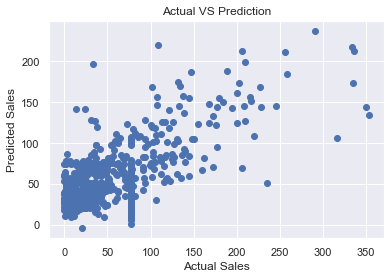



Scores for Lasso() are
Mean Absolute Error: 33.15709619798898
Mean Squared Error: 1933.2773426037077
Root Mean Squared Error: 43.969049826027714
R squared score:  0.4578957060091332
Cross Validation Score is : [0.47937097 0.42518837 0.41549224 0.45306529 0.55134834]
Mean Score : 0.4648930422783589
Difference : 0.006997336269225718


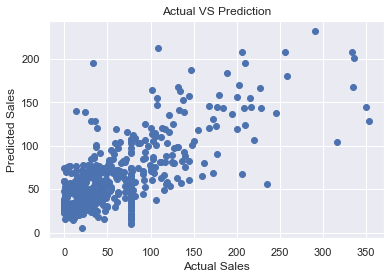



Scores for SVR() are
Mean Absolute Error: 37.91882639680143
Mean Squared Error: 2965.639310455902
Root Mean Squared Error: 54.457683667742444
R squared score:  0.16841429359480742
Cross Validation Score is : [0.14276436 0.15145953 0.16698976 0.08936626 0.12776912]
Mean Score : 0.135669807154389
Difference : -0.03274448644041841


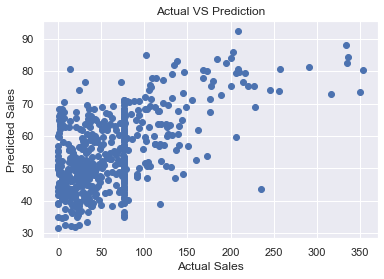



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 39.10959260086447
Mean Squared Error: 3196.4656798742276
Root Mean Squared Error: 56.5372945928104
R squared score:  0.10368898839908691
Cross Validation Score is : [0.12591759 0.21984044 0.10835357 0.27493717 0.30776159]
Mean Score : 0.20736207166288662
Difference : 0.1036730832637997


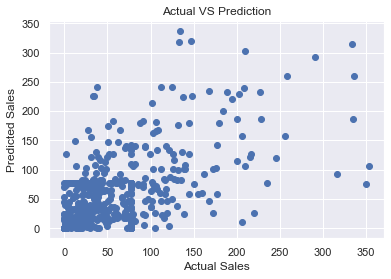



Scores for RandomForestRegressor() are
Mean Absolute Error: 29.362880003941314
Mean Squared Error: 1712.161551209937
Root Mean Squared Error: 41.37827390322048
R squared score:  0.51989809818651
Cross Validation Score is : [0.58517618 0.63983759 0.51493201 0.60715067 0.61410859]
Mean Score : 0.5922410111182119
Difference : 0.07234291293170192


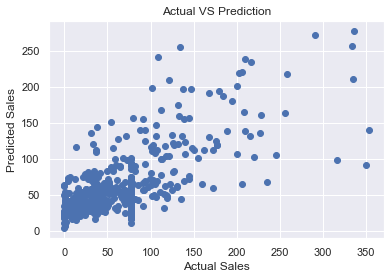



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 28.8541139891925
Mean Squared Error: 1660.8918093897782
Root Mean Squared Error: 40.754040405704295
R squared score:  0.534274487222901
Cross Validation Score is : [0.60997175 0.62392215 0.59140398 0.6427473  0.63964336]
Mean Score : 0.6215377080979161
Difference : 0.08726322087501504


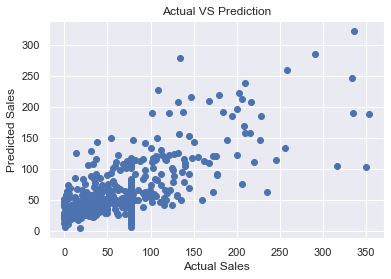

In [48]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

# It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

Hyperparamter Tuning and treating overfitting/underfitting

In [49]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [50]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [51]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [52]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.4774675295977726
The mean absolute error 29.557966219365987
root_mean_squared_error: 39.85568919650822


In [53]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [54]:
GB_l=joblib.load('gross_collection.obj')

# To prepare model for Number of votes.

Scaling of Independent Features

In [55]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

Predicting the best random state

In [56]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5403909065634782
At random state 0, The test accuracy is :0.5044197831985677


At random state 1, The training accuracy is :0.516716398495948
At random state 1, The test accuracy is :0.5543139964580479


At random state 2, The training accuracy is :0.5114566880956064
At random state 2, The test accuracy is :0.56011473482326


At random state 3, The training accuracy is :0.5275049863364744
At random state 3, The test accuracy is :0.5282081769150473


At random state 4, The training accuracy is :0.5473720670596354
At random state 4, The test accuracy is :0.4920010643115633


At random state 5, The training accuracy is :0.534712905247301
At random state 5, The test accuracy is :0.5115502479380094


At random state 6, The training accuracy is :0.5295672937140649
At random state 6, The test accuracy is :0.5252618061065125


At random state 7, The training accuracy is :0.5416302654762905
At random state 7, The test accuracy is :0.500764295346793

At random state 1, The training accuracy is :0.4882717245427457 At random state 1, The test accuracy is :0.6218999865494999

In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1045, 14) (1045,)
(515, 14) (515,)


Scores for LinearRegression() are
Mean Absolute Error: 77337.96389151893
Mean Squared Error: 11031817266.32495
Root Mean Squared Error: 105032.45815615737
R squared score:  0.5543139964580479
Cross Validation Score is : [0.40893129 0.49260385 0.39557631 0.5718969  0.58949147]
Mean Score : 0.4916999648348403
Difference : -0.06261403162320761


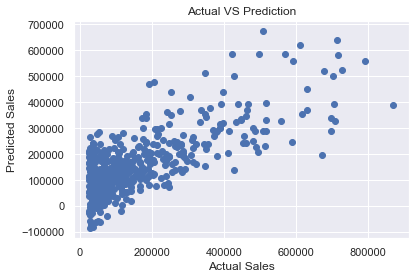



Scores for Lasso() are
Mean Absolute Error: 77337.8713785155
Mean Squared Error: 11031848284.408691
Root Mean Squared Error: 105032.60581556897
R squared score:  0.5543127433258171
Cross Validation Score is : [0.40892805 0.49260299 0.39557644 0.57190344 0.58949855]
Mean Score : 0.4917018945108381
Difference : -0.06261084881497903


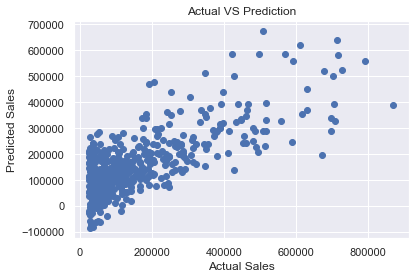



Scores for SVR() are
Mean Absolute Error: 105702.10862284213
Mean Squared Error: 28889325611.65189
Root Mean Squared Error: 169968.60184061024
R squared score:  -0.1671302892391502
Cross Validation Score is : [-0.13463306 -0.10994695 -0.08763224 -0.25470767 -0.17056729]
Mean Score : -0.1514974444765072
Difference : 0.015632844762642983


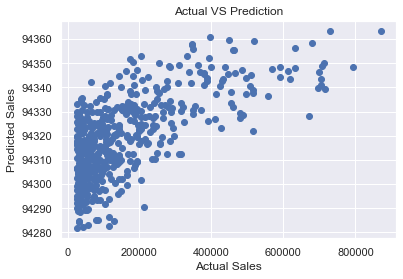



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 73433.4291262136
Mean Squared Error: 12195710168.046602
Root Mean Squared Error: 110434.1893076895
R squared score:  0.5072926614054256
Cross Validation Score is : [0.44048071 0.34012359 0.29419667 0.33492391 0.34109223]
Mean Score : 0.3501634215630809
Difference : -0.15712923984234473


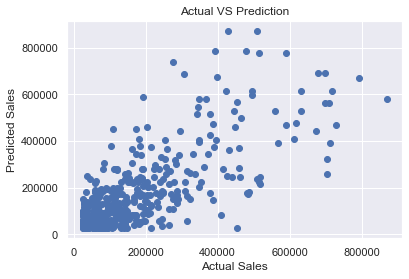



Scores for RandomForestRegressor() are
Mean Absolute Error: 57959.84636893204
Mean Squared Error: 7347682694.334984
Root Mean Squared Error: 85718.6251309188
R squared score:  0.7031532288584175
Cross Validation Score is : [0.62728251 0.70387338 0.65486527 0.67457816 0.71381182]
Mean Score : 0.6748822261162176
Difference : -0.028271002742199847


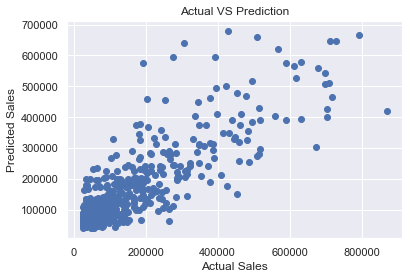



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 53739.30727622359
Mean Squared Error: 6100634745.033395
Root Mean Squared Error: 78106.56019204401
R squared score:  0.7535340322502564
Cross Validation Score is : [0.64795814 0.75878758 0.72483082 0.70468607 0.70510485]
Mean Score : 0.70827349336253
Difference : -0.04526053888772641


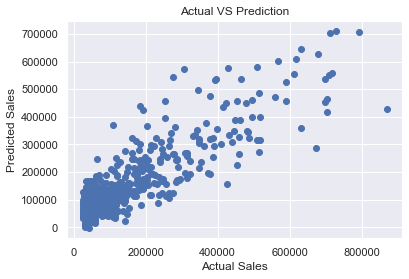

In [58]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

# It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

Hyperparamter Tuning and treating overfitting/underfitting

In [59]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [60]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [61]:
GB1=GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7542841159534958
The mean absolute error 53500.231809499055
root_mean_squared_error: 77987.61658844499


In [62]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [63]:
GB1_l=joblib.load('votes.obj')